## 0-1. Seabornの導入

In [70]:
import piplite
import pyodide
await piplite.install("seaborn")

import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
sns.set_theme(style="darkgrid")

最初の設定なので必ず上のコードを回す

In [173]:
np.random.seed(12345)
data = pd.DataFrame({"GPA":np.random.normal(2,0.5,100)})
data.head()

,GPA
0,1.897646
1,2.239472
2,1.740281
3,1.722135
4,2.982890


データを作成して、dataという名前で保存した

<AxesSubplot:xlabel='GPA', ylabel='Count'>

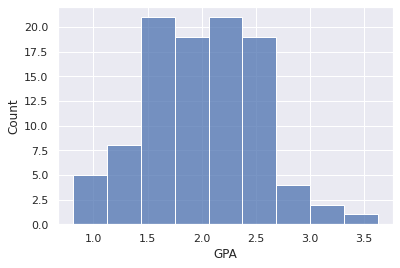

In [72]:
sns.histplot(data=data, x="GPA")

Seabornパッケージのヒストグラムを描く関数はhistplotで、基本的にsns.histplot(data=データの名前, x=描きたい変数の名前)である

<AxesSubplot:xlabel='GPA', ylabel='Count'>

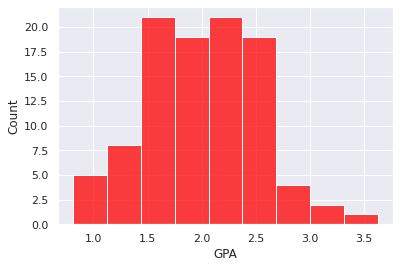

In [73]:
sns.histplot(data=data, x="GPA", color="red")

colorオプションで棒の色を変えられる

<AxesSubplot:xlabel='GPA', ylabel='Count'>

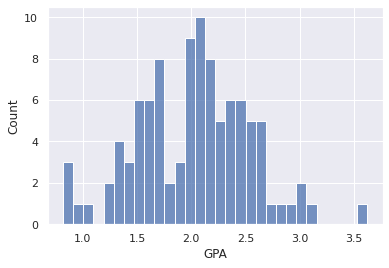

In [74]:
sns.histplot(data=data, x="GPA", bins=30)

binsオプションで棒の数を調整できる

<AxesSubplot:xlabel='GPA', ylabel='Count'>

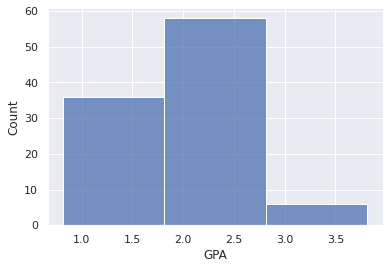

In [75]:
sns.histplot(data=data, x="GPA", binwidth=1)

binwidthオプションで棒の範囲を調整できる

<AxesSubplot:xlabel='GPA', ylabel='Proportion'>

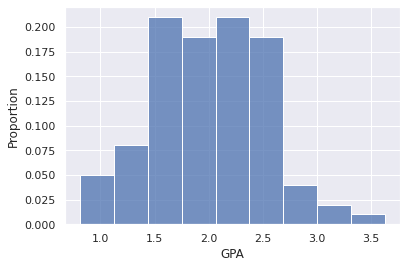

In [83]:
sns.histplot(data=data, x="GPA", stat="proportion")

stat="proportion"を指定することで、相対度数を表現できる

## 0-2. プロットの設定

Text(0.5, 0, 'GPA(Grade Point Average)')

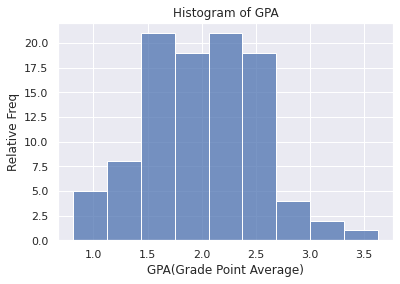

In [82]:
sns.histplot(data=data, x="GPA")
plt.title("Histogram of GPA")
plt.ylabel("Relative Freq")
plt.xlabel("GPA(Grade Point Average)")

- plt.title()でタイトルの設定
- plt.ylabel()で縦軸のラベル設定
- plt.xlabel()で横軸のラベル設定

注意：日本語を対応させるにはものすごくややこしい作業が必要なので、英語だけ使う

## 1. 学校のヒストグラム

In [ ]:
data = pd.read_csv(pyodide.http.open_url("https://raw.githubusercontent.com/ChungWookyung/kg-jupyterlite-data-analysis/main/content/DATA/mhigh.csv"))
data.head()

,氏名,氏名.カタカナ.,性別,学年,国語,数学,成績合計,身長,体重,クラス
0,住田佳織,スミダカオリ,女,3,91,99,190,154.9,51.2,A
1,野中辰男,ノナカタツオ,男,3,88,94,182,172.8,65.3,A
2,田村比呂志,タムラヒロシ,男,3,99,80,179,171.3,62.4,A
3,南部愛梨,ナンブアイリ,女,3,77,99,176,157.8,54.3,A
4,熊沢悠生,クマザワユウセイ,男,1,88,87,175,168.6,58.8,A


データを読み込んできた。

In [120]:
data.groupby(["学年","クラス"]).mean()[["国語","数学","成績合計"]]

国語         数学        成績合計
学年 クラス                                  
1  A    73.285714  76.250000  149.535714
   B    59.578947  70.473684  130.052632
   C    58.714286  61.428571  120.142857
   D    52.315789  59.052632  111.368421
   E    50.810811  53.351351  104.162162
   F    44.250000  51.416667   95.666667
   G    38.314286  47.142857   85.457143
   H    26.312500  36.281250   62.593750
2  A    72.826087  75.173913  148.000000
   B    62.724138  68.517241  131.241379
   C    59.000000  61.235294  120.235294
   D    53.032258  58.580645  111.612903
   E    47.259259  57.037037  104.296296
   F    44.676471  51.470588   96.147059
   G    39.297297  45.189189   84.486486
   H    27.433333  35.633333   63.066667
3  A    71.972973  80.783784  152.756757
   B    62.342105  69.000000  131.342105
   C    57.619048  63.380952  121.000000
   D    54.037037  57.629630  111.666667
   E    51.000000  52.950000  103.950000
   F    46.000000  49.862069   95.862069
   G    36.708333  46.791667   83.500000
   H    30.516129  35.387097   65.903226

前回の最後のように、データの成績を学年・クラス別で見ることができる

In [118]:
data.groupby(["学年","性別"]).mean()[["身長","体重"]]

身長         体重
学年 性別                       
1  女   157.359048  52.327619
   男   169.205983  60.549573
2  女   157.341667  52.681250
   男   170.172727  61.828788
3  女   157.800000  53.173585
   男   170.756198  62.614876

同じように身長と体重を学年・性別で見ることができる

In [122]:
data.columns = ["name","katakana","sex","grade","japanese","math","sum","height","weight","class"]
data["sex"] = data["sex"].replace({"男":"Male","女":"Female"})
data.head()

,name,katakana,sex,grade,japanese,math,sum,height,weight,class
0,住田佳織,スミダカオリ,Female,3,91,99,190,154.9,51.2,A
1,野中辰男,ノナカタツオ,Male,3,88,94,182,172.8,65.3,A
2,田村比呂志,タムラヒロシ,Male,3,99,80,179,171.3,62.4,A
3,南部愛梨,ナンブアイリ,Female,3,77,99,176,157.8,54.3,A
4,熊沢悠生,クマザワユウセイ,Male,1,88,87,175,168.6,58.8,A


Seabornで日本語を使えないため、全部英語の表記に変えた
- sex: 性別の英語表記(Female:女、Male:男)
- grade: 学年の英語表記
- japanese: 国語の成績
- math: 数学の成績
- sum：　成績の合計
- height: 身長の英語表記
- weight: 体重の英語表記
- class: クラス

<AxesSubplot:xlabel='height', ylabel='Count'>

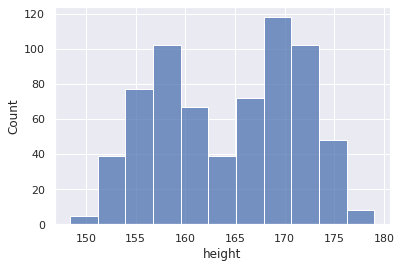

In [123]:
sns.histplot(data=data, x="height")

身長のヒストグラム

<AxesSubplot:xlabel='weight', ylabel='Count'>

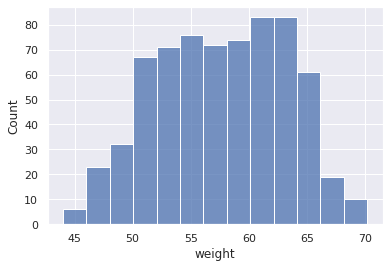

In [124]:
sns.histplot(data=data, x="weight")

体重のヒストグラム

In [ ]:
fdata = data[data["sex"] == "Female"]
mdata = data[data["sex"] == "Male"]

女性と男性のデータを別々に分けてセーブした。

<AxesSubplot:xlabel='height', ylabel='Count'>

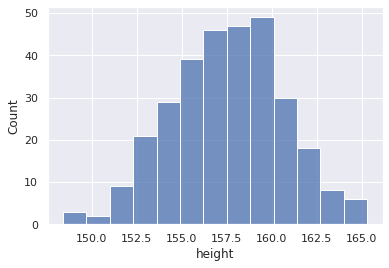

In [126]:
sns.histplot(data=fdata, x="height")

女性の身長のヒストグラム

<AxesSubplot:xlabel='height', ylabel='Count'>

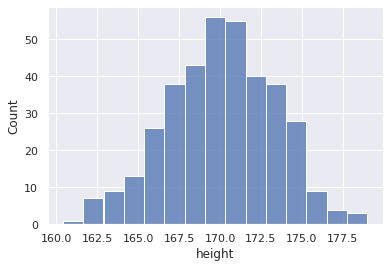

In [127]:
sns.histplot(data=mdata, x="height")

男性の身長のヒストグラム

<AxesSubplot:xlabel='height', ylabel='Count'>

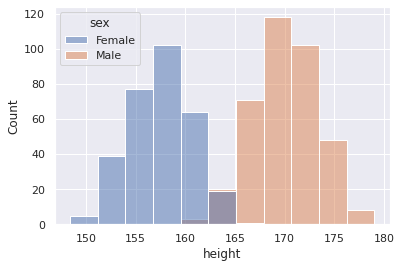

In [128]:
sns.histplot(data=data, x="height", hue="sex")

hue=のオプションを使うと、グループ別のヒストグラムが見れる

<AxesSubplot:xlabel='math', ylabel='Count'>

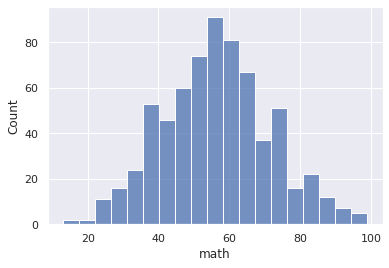

In [129]:
sns.histplot(data=data, x="math")

数学の成績のヒストグラム

<AxesSubplot:xlabel='japanese', ylabel='Count'>

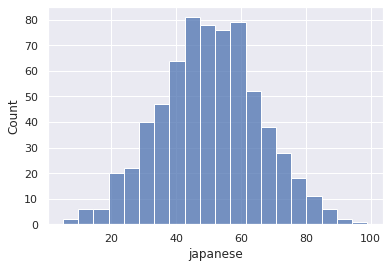

In [130]:
sns.histplot(data=data, x="japanese")

国語の成績のヒストグラム

<AxesSubplot:xlabel='sum', ylabel='Count'>

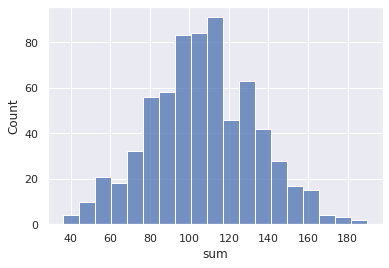

In [131]:
sns.histplot(data=data, x="sum")

成績合計のヒストグラム

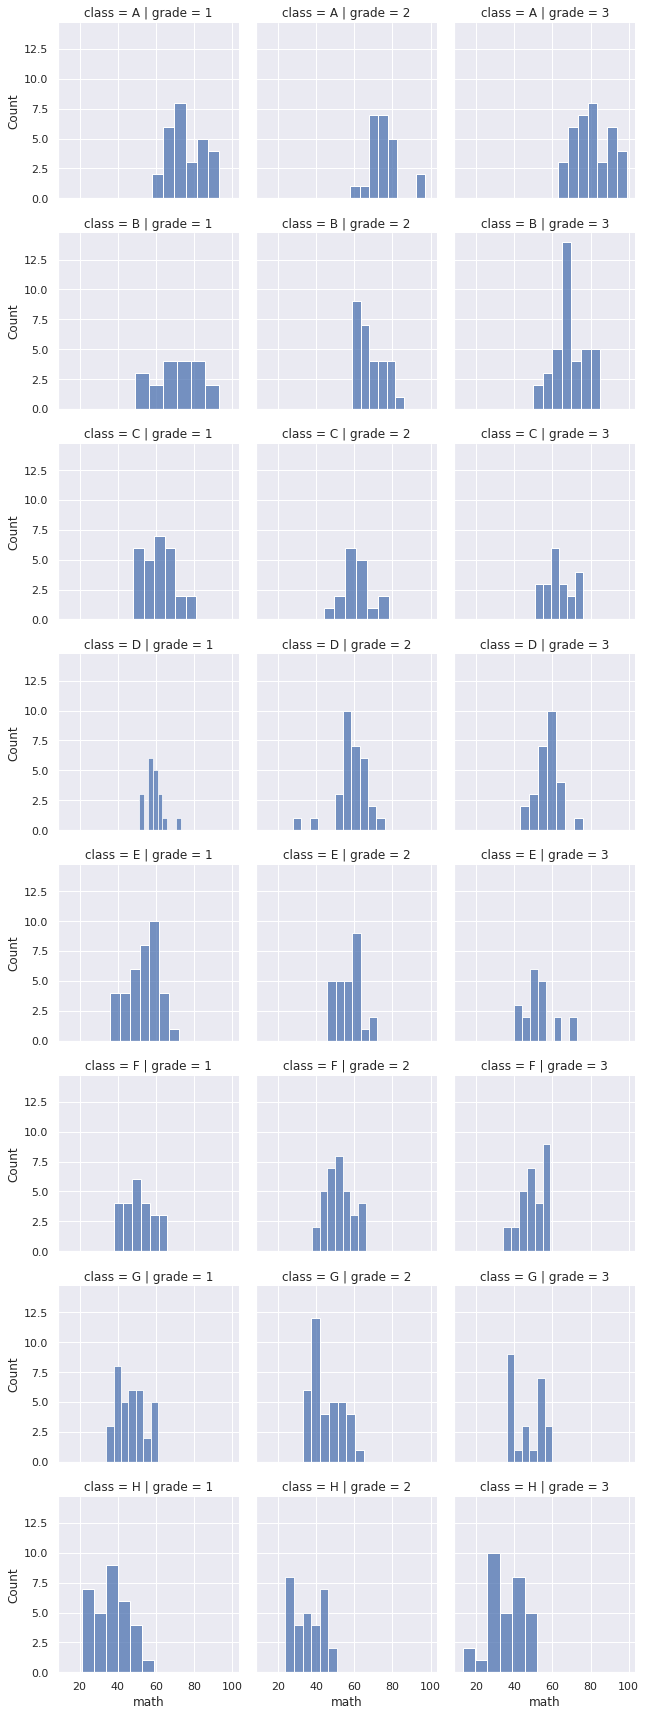

In [136]:
g = sns.FacetGrid(data, col="grade", row="class")
g.map_dataframe(sns.histplot, x="math")

学年とクラス別の数学成績のヒストグラム

## 2. 年収のヒストグラム

In [ ]:
data = pd.read_csv(pyodide.http.open_url("https://raw.githubusercontent.com/ChungWookyung/kg-jupyterlite-data-analysis/main/content/DATA/CPS1988.csv"))
data.head()

,wage,education,experience,ethnicity,smsa,region,parttime
0,354.94,7,45,cauc,yes,northeast,no
1,123.46,12,1,cauc,yes,northeast,yes
2,370.37,9,9,cauc,yes,northeast,no
3,754.94,11,46,cauc,yes,northeast,no
4,593.54,12,36,cauc,yes,northeast,no


- wage: 週給（ドル単位）
- education: 教育年数
- experience: 経験年数（働いた年数）
- ethnicity: 人種(caucは白人、afamは黒人)
- smsa: 都心に住んでいるかどうか
- region: 地域
- parttime: アルバイトかどうか

<AxesSubplot:xlabel='wage', ylabel='Count'>

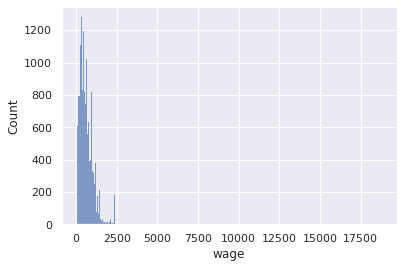

In [140]:
sns.histplot(data=data, x="wage")

週給のヒストグラム

<AxesSubplot:xlabel='wage', ylabel='Count'>

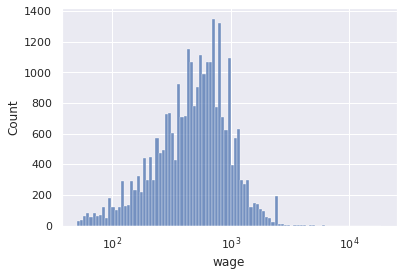

In [141]:
sns.histplot(data=data, x="wage", log_scale=True)

log_scale=Trueをつけて、対数で見ることができる

<AxesSubplot:xlabel='wage', ylabel='Count'>

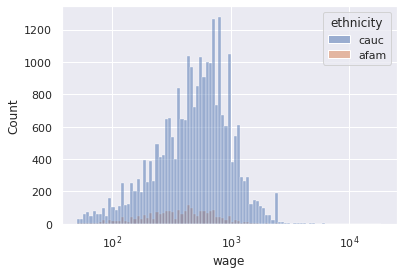

In [142]:
sns.histplot(data=data, x="wage", log_scale=True, hue="ethnicity")

hue=オプションを利用して人種別の給料ヒストグラムを出したが、あまり役立たない

In [143]:
white_data = data[data["ethnicity"] == "cauc"]
black_data = data[data["ethnicity"] == "afam"]

白人と黒人のデータを別々に分けて保存した

<AxesSubplot:xlabel='wage', ylabel='Count'>

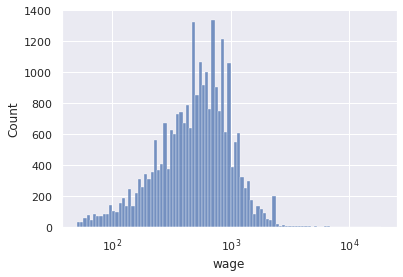

In [144]:
sns.histplot(data=white_data, x="wage", log_scale=True)

白人だけのヒストグラム

<AxesSubplot:xlabel='wage', ylabel='Count'>

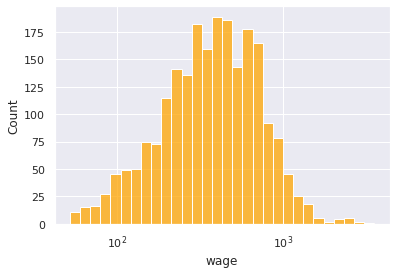

In [150]:
sns.histplot(data=black_data, x="wage", log_scale=True, color="orange")

黒人だけのヒストグラム

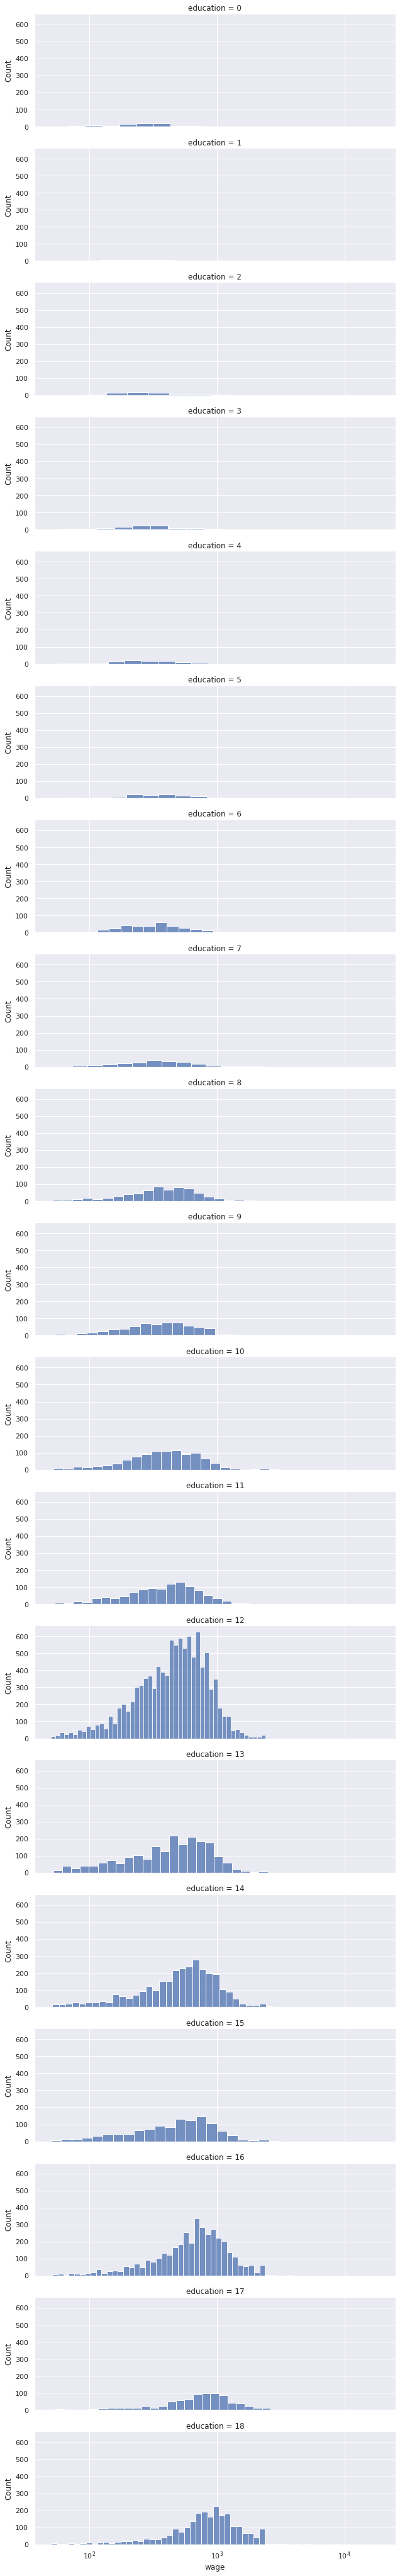

In [149]:
g = sns.FacetGrid(data, row="education", aspect=3)
g.map_dataframe(sns.histplot, x="wage", log_scale=True)

教育年数別の給料ヒストグラム

## 3. コロナ禍のヒストグラム

In [ ]:
data = pd.read_csv(pyodide.http.open_url("https://raw.githubusercontent.com/ChungWookyung/kg-jupyterlite-data-analysis/main/content/DATA/covidGDP.csv"))
data.head()

,Entity,Code,Confirmed,GDP,Continent
0,Afghanistan,AFG,29.521,1803.987487,Asia
1,Albania,ALB,230.775,11803.430594,Europe
2,Algeria,DZA,67.396,13913.839363,Africa
3,Angola,AGO,0.737,5819.494971,Africa
4,Antigua and Barbuda,ATG,243.092,21490.942659,North America


- Entity: 国名
- Code: 国のISOコード
- Confirmed: 累積感染者数(人口100万人あたり)
- GDP: 一人当たりGDP(ドル単位)
- Continent: 大陸

<AxesSubplot:xlabel='Confirmed', ylabel='Count'>

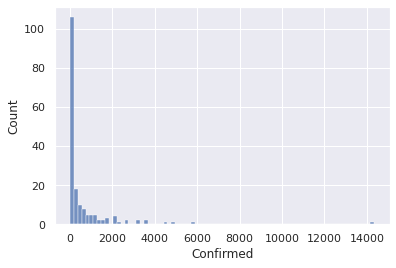

In [177]:
sns.histplot(data=data, x="Confirmed")

累積感染者数のヒストグラム

<AxesSubplot:xlabel='Confirmed', ylabel='Count'>

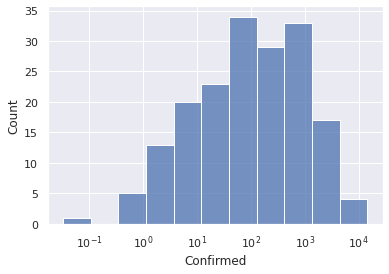

In [178]:
sns.histplot(data=data, x="Confirmed", log_scale=True)

log_scale=Trueオプションを使って、対数で表現したヒストグラム

<AxesSubplot:xlabel='GDP', ylabel='Count'>

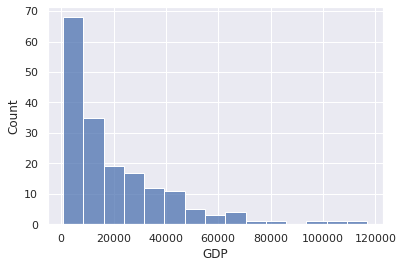

In [179]:
sns.histplot(data=data, x="GDP")

一人当たりGDPのヒストグラム

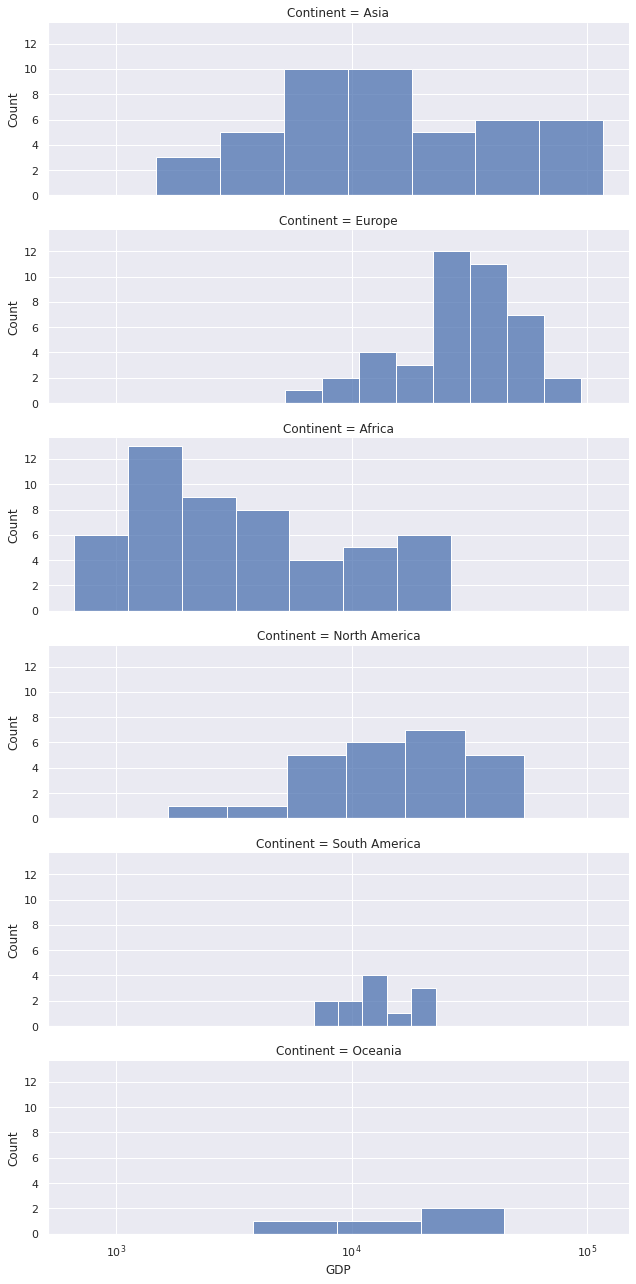

In [180]:
g = sns.FacetGrid(data, row="Continent", aspect=3)
g.map_dataframe(sns.histplot, x="GDP", log_scale=True)

大陸別の一人当たりGDPのヒストグラム

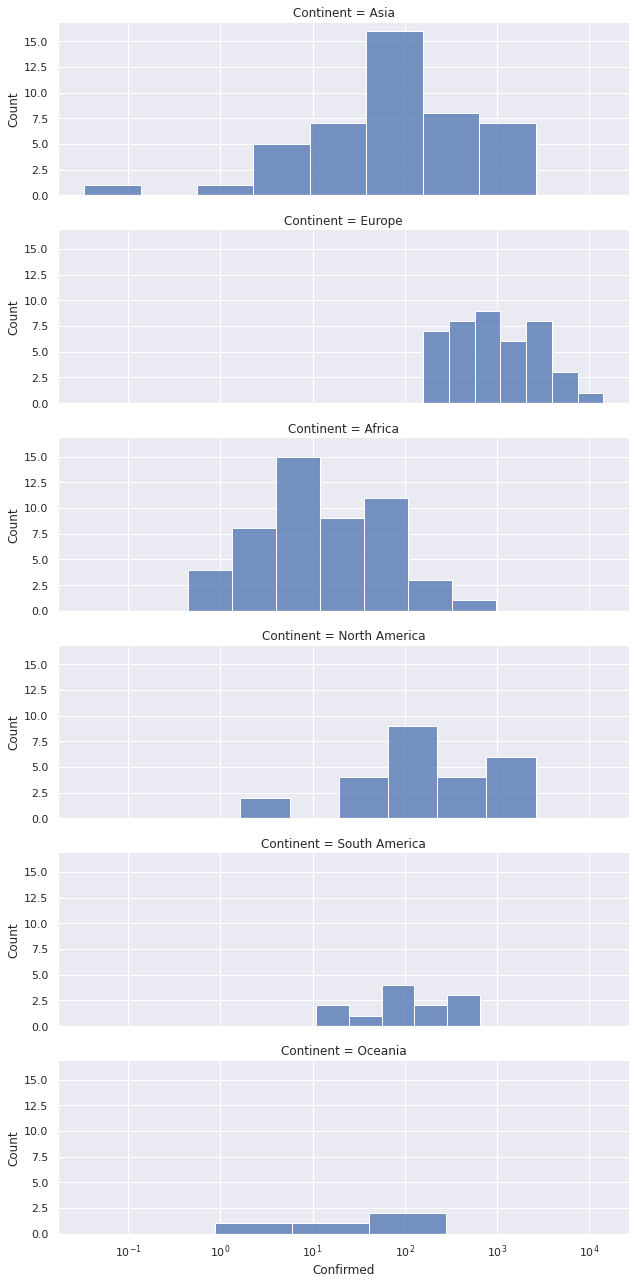

In [181]:
g = sns.FacetGrid(data, row="Continent", aspect=3)
g.map_dataframe(sns.histplot, x="Confirmed", log_scale=True)

大陸別の累積感染者数のヒストグラム

<AxesSubplot:xlabel='GDP', ylabel='Confirmed'>

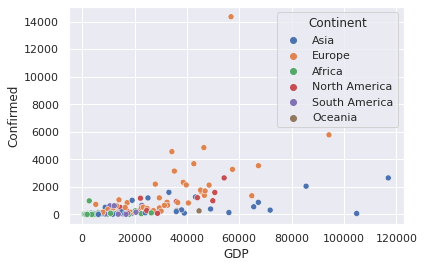

In [171]:
sns.scatterplot(data=data, x="GDP", y="Confirmed", hue="Continent")

次の授業に学ぶ散布図